# Twitter Bot Classifier Part 2

In this series of notebooks, we are using the [Fake Project](https://botometer.iuni.iu.edu/bot-repository/datasets.html) dataset to examine users habits and build a Twitter bot classifier. 
 
Previously, we looked into the potential threats that Twitter bot accounts pose. While some are harmless, others aim to manipulate and deceive viewers. We gathered several Twitter files from the Fake Project to assemble a Tweets and Users datasets. Null values have been dropped and tables have been formatted. Now, we will take a closer look into the features by conducting exploratory data analysis. 

## Tweets Table

In this notebook, we will focus on exploring the tweets table. 

In [1]:
# Numpy and pandas
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as PathEffects

#NLP tools
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

# NLP feature selection 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Reduce Dimensions
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

# Sklearn data clean
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Random Forests 
from sklearn.ensemble import RandomForestClassifier

# Neural Network
from sklearn.neural_network import MLPClassifier

# Evaluate
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_auc_score,accuracy_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Reduce Dimension 
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

# Clustering 
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth, MiniBatchKMeans, DBSCAN
from sklearn.preprocessing import normalize
from scipy.spatial.distance import cdist
from sklearn.metrics import homogeneity_score
from sklearn.metrics import silhouette_score

# Hierarchy clustering
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Math 
import math
from scipy.stats import kurtosis, skew

# Datetime
from datetime import datetime
from dateutil import parser
import time

# Import data
import warnings

In [2]:
tweets = pd.read_csv('/Users/tsawaengsri/Desktop/Data Science Courses/Datasets/cresci-2017.csv/datasets_full.csv/clean_tweets2')
users = pd.read_csv('/Users/tsawaengsri/Desktop/Data Science Courses/Datasets/cresci-2017.csv/datasets_full.csv/clean_users2')

In [3]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6283436 entries, 0 to 6283435
Data columns (total 18 columns):
id                       int64
text                     object
source                   object
user_id                  int64
in_reply_to_status_id    int64
in_reply_to_user_id      int64
retweeted_status_id      int64
retweet_count            int64
reply_count              int64
favorite_count           int64
num_hashtags             int64
num_urls                 int64
num_mentions             int64
created_at               object
timestamp                object
crawled_at               object
updated                  object
class                    int64
dtypes: int64(12), object(6)
memory usage: 862.9+ MB


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7989 entries, 0 to 7988
Data columns (total 24 columns):
id                                    7989 non-null int64
name                                  7989 non-null object
screen_name                           7989 non-null object
statuses_count                        7989 non-null int64
followers_count                       7989 non-null int64
friends_count                         7989 non-null int64
favourites_count                      7989 non-null int64
listed_count                          7989 non-null int64
lang                                  7989 non-null object
profile_image_url                     7989 non-null object
profile_use_background_image          7989 non-null int64
profile_background_image_url_https    7989 non-null object
profile_text_color                    7989 non-null object
profile_image_url_https               7989 non-null object
profile_sidebar_border_color          7989 non-null object
profile_sidebar

### Convert time variables to datetime 
It doesn't appear that time variables such as timestamp or created_at were saved as datetime. We will convert them to their respective data type. 

In [5]:
# Convert the time columns to np.datetime object
tweets['timestamp'] = pd.to_datetime(tweets['timestamp'])

In [6]:
tweets['created_at'] = pd.to_datetime(tweets['created_at'])

In [7]:
tweets['crawled_at'] = pd.to_datetime(tweets['crawled_at'])

In [8]:
tweets['updated'] = pd.to_datetime(tweets['updated'])

In [9]:
# Convert the created_at column to np.datetime object
users['timestamp'] = pd.to_datetime(users['timestamp'])

In [10]:
users['created_at'] = pd.to_datetime(users['created_at'])

In [11]:
users['crawled_at'] = pd.to_datetime(users['crawled_at'])

In [12]:
users['updated'] = pd.to_datetime(users['updated'])

In [13]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6283436 entries, 0 to 6283435
Data columns (total 18 columns):
id                       int64
text                     object
source                   object
user_id                  int64
in_reply_to_status_id    int64
in_reply_to_user_id      int64
retweeted_status_id      int64
retweet_count            int64
reply_count              int64
favorite_count           int64
num_hashtags             int64
num_urls                 int64
num_mentions             int64
created_at               datetime64[ns, UTC]
timestamp                datetime64[ns]
crawled_at               datetime64[ns]
updated                  datetime64[ns]
class                    int64
dtypes: datetime64[ns, UTC](1), datetime64[ns](3), int64(12), object(2)
memory usage: 862.9+ MB


In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7989 entries, 0 to 7988
Data columns (total 24 columns):
id                                    7989 non-null int64
name                                  7989 non-null object
screen_name                           7989 non-null object
statuses_count                        7989 non-null int64
followers_count                       7989 non-null int64
friends_count                         7989 non-null int64
favourites_count                      7989 non-null int64
listed_count                          7989 non-null int64
lang                                  7989 non-null object
profile_image_url                     7989 non-null object
profile_use_background_image          7989 non-null int64
profile_background_image_url_https    7989 non-null object
profile_text_color                    7989 non-null object
profile_image_url_https               7989 non-null object
profile_sidebar_border_color          7989 non-null object
profile_sidebar

In [15]:
tweets.head()

,id,text,source,user_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,timestamp,crawled_at,updated,class
0,515447020405137408,"""Il mare d'inverno è un concetto che il pensie...","<a href=""http://www.Matildadr89.com"" rel=""nofo...",237359828,0,0,0,0,0,0,0,0,0,2014-09-26 10:25:20+00:00,2014-09-26 12:25:20,2014-11-13 01:35:24,2014-11-13 01:35:24,1
1,513551196226093057,Read the History of Corona Beer http://t.co/Z...,"<a href=""http://tweetadder.com"" rel=""nofollow""...",215693377,0,0,0,0,0,0,0,1,0,2014-09-21 04:52:01+00:00,2014-09-21 06:52:01,2014-11-12 23:35:05,2014-11-12 23:35:05,1
2,579534763872149504,After that it would of been up to the person i...,"<a href=""http://twitter.com/download/iphone"" r...",164284493,0,0,0,0,0,0,0,0,0,2015-03-22 06:47:09+00:00,2015-03-22 07:47:09,2015-05-01 13:21:46,2015-05-01 13:21:46,0
3,449751137970028544,RT @kcivey: @marionbarryjr I'm for public fina...,"<a href=""http://twitter.com/download/iphone"" r...",225683965,0,0,449735142085779456,1,0,0,0,0,2,2014-03-29 03:33:21+00:00,2014-03-29 04:33:21,2015-05-01 15:58:20,2015-05-01 15:58:20,0
4,589197488269045760,RT @specuIar: This hit me hard. http://t.co/rY...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",505440359,0,0,589196377353097216,1300,0,0,0,0,1,2015-04-17 22:43:22+00:00,2015-04-18 00:43:22,2015-05-01 13:21:33,2015-05-01 13:21:33,0


In [16]:
users.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,lang,profile_image_url,...,profile_sidebar_border_color,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,created_at,timestamp,crawled_at,updated,class
0,2349966440,Joie Ficher,JoieFicher,80,2,42,0,0,en,http://pbs.twimg.com/profile_images/4365494921...,...,FFFFFF,DDEEF6,http://pbs.twimg.com/profile_background_images...,0000FF,0000FF,2014-02-18 11:22:38+00:00,2014-02-18 12:22:38,2014-05-03 00:22:39,2016-03-15 15:20:24,1
1,343263643,RIP Teveon ,youpettihoe_,36513,2166,1627,2977,0,en,http://pbs.twimg.com/profile_images/5594447898...,...,FFFFFF,FFFFFF,http://pbs.twimg.com/profile_background_images...,FFFAFF,0A7A00,2011-07-27 09:01:04+00:00,2011-07-27 11:01:04,2015-05-01 23:18:23,2016-03-15 16:11:13,0
2,531154412,Bulah Lynne,Lynnevibe,10657,1194,996,1,8,en,http://pbs.twimg.com/profile_images/1914097815...,...,C0DEED,DDEEF6,http://abs.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,2012-03-20 11:48:05+00:00,2012-03-20 12:48:05,2014-05-05 23:24:32,2016-03-15 15:40:08,1
3,2377665366,Katherina Kistle,KatherinaKistle,37,0,38,0,0,en,http://pbs.twimg.com/profile_images/4430041788...,...,FFFFFF,DDEEF6,http://pbs.twimg.com/profile_background_images...,0000FF,0000FF,2014-03-07 21:23:35+00:00,2014-03-07 22:23:35,2014-05-05 00:21:50,2016-03-15 15:16:15,1
4,3015346510,Lindsay Blessing Fan,lindsayspainfan,96,43,113,425,0,es,http://pbs.twimg.com/profile_images/5631073115...,...,000000,000000,http://pbs.twimg.com/profile_background_images...,000000,9266CC,2015-02-03 20:49:38+00:00,2015-02-03 21:49:38,2015-05-02 01:09:46,2016-03-15 16:07:16,0


# Exploratory Data Analysis
We'll start by exploring the Tweets table by keeping a few questions in mind.<br> 
__How many tweets were made by humans and robots?__ <br>
__Which accounts posted the most tweets?__ <br>

In [17]:
# Bot vs human tweets 
counts = tweets['class'].value_counts()
human = counts[0]
bot = counts[1]
human_per = (human/(human + bot))*100
bot_per = (bot/(human + bot))*100
print('There are {} tweets made by humans({:.3f}%) and {} tweets made by bots ({:.3f}%) in the tweets table.'.format(human, human_per, bot, bot_per))

There are 2826718 tweets made by humans(44.987%) and 3456718 tweets made by bots (55.013%) in the tweets table.


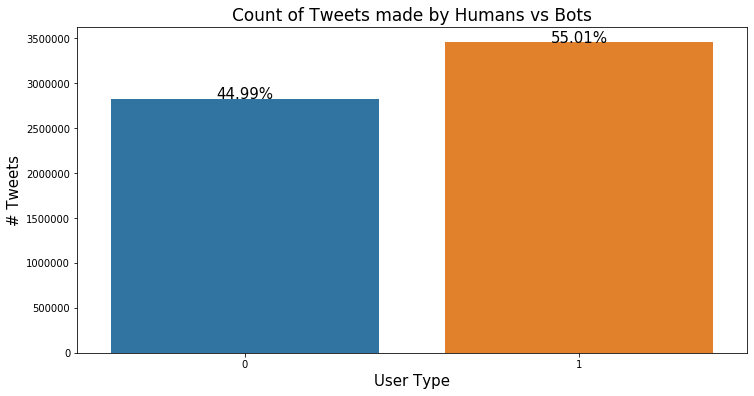

In [18]:
# Plot target variable
plt.figure(figsize=(12,6))
g = sns.countplot(x = 'class', data = tweets)
g.set_title('Count of Tweets made by Humans vs Bots', fontsize = 17)
g.set_xlabel('User Type', fontsize = 15)
g.set_ylabel('# Tweets', fontsize = 15)

for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(tweets) * 100),
            ha="center", fontsize=15) 

As shown in the bar graph, the data consists of 45% tweets by humans and 55% tweets by robots. The ratio between human to robot tweets are close so we do not have an imbalance problem. 

#### Let's look at which accounts tweeted the most. 

In [19]:
# Number of unique user accounts
len(tweets['user_id'].unique().tolist())

5995

There are 5,996 unique user accounts in the Tweets table. 

In [20]:
# Create df for user class
bots = tweets.loc[tweets['class']==1]
gen = tweets.loc[tweets['class']==0]

In [21]:
# Counts of unique user accounts 
bots['user_id'].value_counts()

521370115     3258
334826952     3250
221141363     3250
239910996     3250
982414274     3250
              ... 
2382422750      66
2375328500      64
2382743514      63
2391867347      43
2384976224      38
Name: user_id, Length: 4912, dtype: int64

In [22]:
# Counts of unique user accounts 
gen['user_id'].value_counts()

15044720      3250
497404180     3249
182211050     3247
195076965     3247
14626600      3247
              ... 
492728332       24
2236789484      15
2200425967      14
24386710        13
514061230        3
Name: user_id, Length: 1083, dtype: int64

__Observation__: Based on the total count of tweets, the most frequent tweets from both genuine users and robot accounts share similar traits. The top five tweeters in each class has posted over three thousand tweets. 

In [23]:
# Bot vs human tweets 
counts = users['class'].value_counts()
human = counts[0]
bot = counts[1]
human_per = (human/(human + bot))*100
bot_per = (bot/(human + bot))*100
print('There are {} genuine accounts({:.3f}%) and {} spambot accounts ({:.3f}%) in the users table.'.format(human, human_per, bot, bot_per))

There are 3083 genuine accounts(38.591%) and 4906 spambot accounts (61.409%) in the users table.


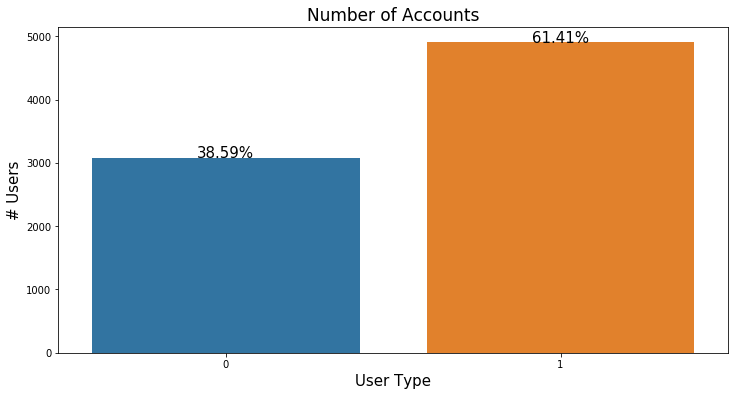

In [24]:
# Plot target variable
plt.figure(figsize=(12,6))
g = sns.countplot(x = 'class', data = users)
g.set_title('Number of Accounts', fontsize = 17)
g.set_xlabel('User Type', fontsize = 15)
g.set_ylabel('# Users', fontsize = 15)

for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(users) * 100),
            ha="center", fontsize=15) 

In [25]:
# Unique User
len(users['id'].value_counts())

7989

In [26]:
# Unique User
len(tweets['user_id'].value_counts())

5995

## Merging Users and Tweets Table

In [27]:
users.rename(columns ={'id': 'user_id'}, inplace =True)
df_full = pd.merge(users, tweets,  how='inner', on=['user_id'] )

In [28]:
df_full.head()

,user_id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,lang,profile_image_url,...,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at_y,timestamp_y,crawled_at_y,updated_y,class_y
0,2349966440,Joie Ficher,JoieFicher,80,2,42,0,0,en,http://pbs.twimg.com/profile_images/4365494921...,...,0,0,0,0,0,2014-04-26 18:56:00+00:00,2014-04-26 20:56:00,2014-11-13 01:44:20,2014-11-13 01:44:20,1
1,2349966440,Joie Ficher,JoieFicher,80,2,42,0,0,en,http://pbs.twimg.com/profile_images/4365494921...,...,0,0,0,0,0,2014-04-29 02:19:20+00:00,2014-04-29 04:19:20,2014-11-13 01:44:20,2014-11-13 01:44:20,1
2,2349966440,Joie Ficher,JoieFicher,80,2,42,0,0,en,http://pbs.twimg.com/profile_images/4365494921...,...,0,0,0,0,1,2014-06-20 21:48:08+00:00,2014-06-20 23:48:08,2014-11-13 01:44:20,2014-11-13 01:44:20,1
3,2349966440,Joie Ficher,JoieFicher,80,2,42,0,0,en,http://pbs.twimg.com/profile_images/4365494921...,...,0,0,0,0,0,2014-04-29 02:18:48+00:00,2014-04-29 04:18:48,2014-11-13 01:44:20,2014-11-13 01:44:20,1
4,2349966440,Joie Ficher,JoieFicher,80,2,42,0,0,en,http://pbs.twimg.com/profile_images/4365494921...,...,0,0,0,0,0,2014-04-28 18:37:26+00:00,2014-04-28 20:37:26,2014-11-13 01:44:20,2014-11-13 01:44:20,1


In [29]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5968328 entries, 0 to 5968327
Data columns (total 41 columns):
user_id                               int64
name                                  object
screen_name                           object
statuses_count                        int64
followers_count                       int64
friends_count                         int64
favourites_count                      int64
listed_count                          int64
lang                                  object
profile_image_url                     object
profile_use_background_image          int64
profile_background_image_url_https    object
profile_text_color                    object
profile_image_url_https               object
profile_sidebar_border_color          object
profile_sidebar_fill_color            object
profile_background_image_url          object
profile_background_color              object
profile_link_color                    object
created_at_x                          d

In [30]:
# Drop unwanted columns 
df_full = df_full.drop(columns=['id','crawled_at_y','updated_x', 'updated_y','class_y', 'crawled_at_x','profile_image_url',
                     'profile_use_background_image','profile_background_image_url_https','profile_text_color',
                     'profile_image_url_https','profile_sidebar_border_color','profile_sidebar_fill_color','profile_background_image_url',
                      'profile_background_color','profile_link_color','source','in_reply_to_status_id',
                     'in_reply_to_user_id','retweeted_status_id'])

In [31]:
df_full.rename(columns ={'created_at_x': 'u_created_at','created_at_y':'t_created_at','timestamp_x':'u_timestamp',
                    'timestamp_y':'t_timestamp','class_x':'class'}, inplace =True)

In [32]:
df_full.isnull().values.any()

False

In [33]:
len(df_full['user_id'].value_counts())

5874

In [34]:
df_full.shape

(5968328, 21)

In [35]:
# Collect only English tweets
df = df_full.loc[df_full['lang'] == 'en']

In [36]:
df.shape

(4338180, 21)

## Subsampling 

Due to hardware and memory limitations, we will reduce the size of the dataset and subsample 0.05% of tweets

In [37]:
sub_tweets = df.groupby('class').apply(pd.DataFrame.sample, frac=0.005).reset_index(drop=True)

In [38]:
sub_tweets.shape

(21691, 21)

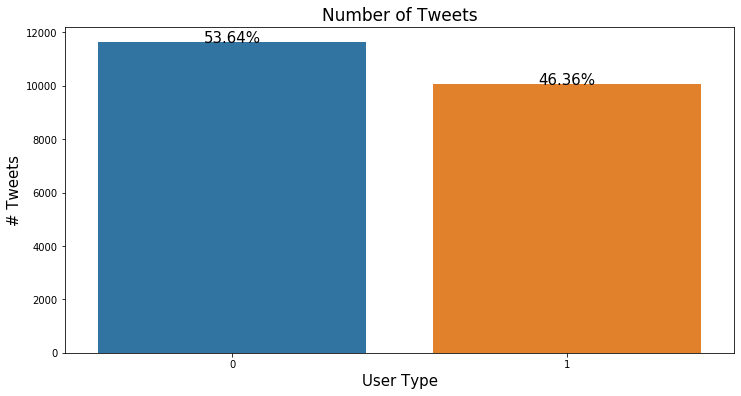

In [39]:
# Plot target variable
plt.figure(figsize=(12,6))
g = sns.countplot(x = 'class', data = sub_tweets)
g.set_title('Number of Tweets', fontsize = 17)
g.set_xlabel('User Type', fontsize = 15)
g.set_ylabel('# Tweets', fontsize = 15)

for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(sub_tweets) * 100),
            ha="center", fontsize=15) 

__Observation__: 

## Correlation
We'll start by exmaining the correlation between features and target varaible. 

In [40]:
# Find correlations with the target and sort
corr = sub_tweets.corr()['class'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', corr.tail(15))
print('\nMost Negative Correlations:\n', corr.head(15))

Most Positive Correlations:
 num_mentions       -0.435674
favourites_count   -0.348957
statuses_count     -0.251539
num_hashtags       -0.159283
favorite_count     -0.088187
listed_count       -0.079511
retweet_count      -0.055146
followers_count    -0.016905
user_id             0.121728
friends_count       0.133122
num_urls            0.210698
class               1.000000
reply_count              NaN
Name: class, dtype: float64

Most Negative Correlations:
 num_mentions       -0.435674
favourites_count   -0.348957
statuses_count     -0.251539
num_hashtags       -0.159283
favorite_count     -0.088187
listed_count       -0.079511
retweet_count      -0.055146
followers_count    -0.016905
user_id             0.121728
friends_count       0.133122
num_urls            0.210698
class               1.000000
reply_count              NaN
Name: class, dtype: float64


In [41]:
# Correlation 
top_feat = np.absolute(sub_tweets.corr()['class']).sort_values(ascending=False)[:11]
top_feat

class               1.000000
num_mentions        0.435674
favourites_count    0.348957
statuses_count      0.251539
num_urls            0.210698
num_hashtags        0.159283
friends_count       0.133122
user_id             0.121728
favorite_count      0.088187
listed_count        0.079511
retweet_count       0.055146
Name: class, dtype: float64

__Observation__: The correlation between our target variable and the top features are rather week. The strongest correlation to class is the num_mentions(-47%). This could possibly hint towards retweets and replying to other accounts to be a good indicator of whether a tweet was generated by a human or robot. 

In [42]:
# Top 10 features
print(top_feat.index)

Index(['class', 'num_mentions', 'favourites_count', 'statuses_count',
       'num_urls', 'num_hashtags', 'friends_count', 'user_id',
       'favorite_count', 'listed_count', 'retweet_count'],
      dtype='object')


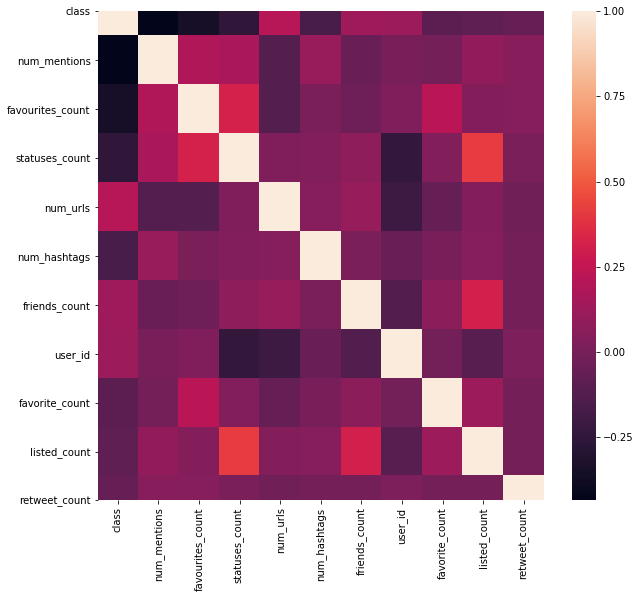

In [43]:
pp = sub_tweets[top_feat.index]
plt.figure(figsize=(10,9))
corr = pp.corr()
sns.heatmap(corr)
plt.savefig('heatmat.png')

__Observation__: There doesn't appear to be high collinearity among the features. The correlation between in_reply_to_user_id and in_reply_to_status_id seems to be higher than 0.5. We'll probably drop these features during feature selection since they are not the main focus of tweet info.  

# Feature Engineering and Selection

Since we have identified trends and relationship within the dataset, we will use our findings to select a set of features for our model. 

For this assignment, we will take the following steps for feature selection:
 * creating new variables by aggregation
 * dropping unwanted varaibles
 * encode for tweets
 
### Users based features

In [44]:
# Function to calculate the age of the account given creation time
def calculate_age(created_at):
    today = datetime.now()
    return today.year - created_at.year 

In [45]:
# Create new features 
sub_tweets['account_age_yr'] = sub_tweets['u_created_at'].apply(lambda x: calculate_age(x))
sub_tweets['digit_in_name'] = sub_tweets['screen_name'].apply(lambda x: sum(c.isdigit() for c in x))
sub_tweets['user_name_len'] = sub_tweets['screen_name'].apply(len)


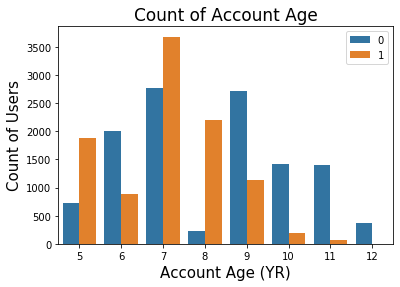

In [46]:
# Plot age of accounts 
g = sns.countplot(x='account_age_yr', hue= 'class',data=sub_tweets)
g.set_title('Count of Account Age', fontsize = 17)
g.set_xlabel('Account Age (YR)', fontsize = 15)
g.set_ylabel('Count of Users', fontsize = 15)
plt.legend(loc='upper right')

__Observations__: 

### Tweets based features 

In [47]:
# Create new features 
sub_tweets['tweet_hour'] = sub_tweets['t_created_at'].apply(lambda x: x.hour)
sub_tweets['tweet_month'] = sub_tweets['t_created_at'].apply(lambda x: x.month)
sub_tweets['tweet_day'] = sub_tweets['t_created_at'].apply(lambda x: x.day)
sub_tweets['tweet_year'] = sub_tweets['t_created_at'].apply(lambda x: x.year)
sub_tweets['tweet_length'] = sub_tweets['text'].apply(len)
sub_tweets['num_of_words'] = sub_tweets['text'].str.split().apply(len)

In [48]:
sub_tweets.head()

,user_id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,lang,u_created_at,...,t_timestamp,account_age_yr,digit_in_name,user_name_len,tweet_hour,tweet_month,tweet_day,tweet_year,tweet_length,num_of_words
0,228978063,✨Corbin Thomas✨,Corbin_Thomas35,7727,1118,755,254,3,en,2010-12-21 05:49:07+00:00,...,2015-04-23 19:11:31,9,2,15,17,4,23,2015,93,14
1,15044720,Ange,blue_raven,59052,332,833,1862,45,en,2008-06-08 05:49:17+00:00,...,2015-04-29 08:59:44,11,0,10,6,4,29,2015,111,20
2,27582887,Paul,knoxynz,36913,807,907,3262,9,en,2009-03-30 04:20:30+00:00,...,2014-07-18 14:00:18,10,0,7,12,7,18,2014,70,12
3,2248762537,AJ,AlZahraaokay,7588,235,112,10979,0,en,2013-12-16 13:27:47+00:00,...,2015-02-11 09:22:30,6,0,12,8,2,11,2015,140,27
4,2177075531,OptimusProductionsTT,Optimusprott,2053,409,1116,381,4,en,2013-11-11 16:18:00+00:00,...,2014-11-22 14:18:27,6,0,12,13,11,22,2014,125,17


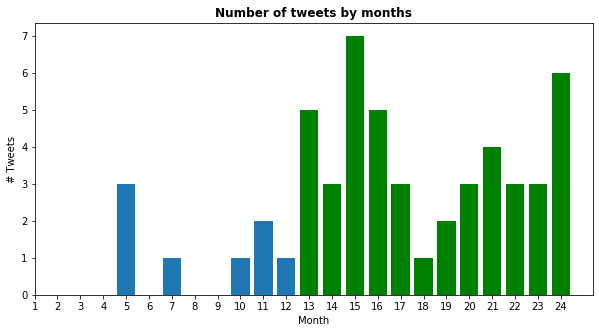

In [49]:
# Number of tweets by months

sub_tweets['t_month_year'] = sub_tweets['t_created_at'].apply(lambda x: str(x.year)+'-'+str(x.month)+'-1')
sub_tweets['t_month_year'].unique()[0]
sub_tweets['t_month_year'] = pd.to_datetime(sub_tweets['t_month_year'])

sub_tweets[['t_created_at', 't_month_year']].head()

yr_monthly_tweets2 = sub_tweets.groupby(['tweet_month','tweet_year']).size().unstack()


plt.figure(figsize=(10,5))

plt.title('Number of tweets by months', fontsize=12, fontweight='bold')
plt.bar(yr_monthly_tweets2.index, yr_monthly_tweets2.values[:,0])
plt.bar(yr_monthly_tweets2.index+12, yr_monthly_tweets2.values[:,1], color='g')
plt.xticks(list(yr_monthly_tweets2.index)+list(yr_monthly_tweets2.index+12))
plt.xlabel('Month')
plt.ylabel('# Tweets')
plt.show() 

In [50]:
sub_tweets['t_month_year'].describe()

count                   21691
unique                     82
top       2014-10-01 00:00:00
freq                     4618
first     2008-05-01 00:00:00
last      2015-05-01 00:00:00
Name: t_month_year, dtype: object

In [51]:
sub_tweets['tweet_year'].describe()

count    21691.000000
mean      2014.111982
std          0.761965
min       2008.000000
25%       2014.000000
50%       2014.000000
75%       2015.000000
max       2015.000000
Name: tweet_year, dtype: float64

In [52]:
sub_tweets.shape

(21691, 31)

__Observation__: This dataset contains tweets posted from 2007 to 2015. Majority of the tweets were collected during 2014 and 2015. 

In [53]:
sub_tweets.columns

Index(['user_id', 'name', 'screen_name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'listed_count', 'lang',
       'u_created_at', 'u_timestamp', 'class', 'text', 'retweet_count',
       'reply_count', 'favorite_count', 'num_hashtags', 'num_urls',
       'num_mentions', 't_created_at', 't_timestamp', 'account_age_yr',
       'digit_in_name', 'user_name_len', 'tweet_hour', 'tweet_month',
       'tweet_day', 'tweet_year', 'tweet_length', 'num_of_words',
       't_month_year'],
      dtype='object')

## Text Processing: Clean and Transform Tweets

Before we can have a model process information from the tweets, we must convert text to numeric values that machines can understand. 

We will clean the tweets with the following steps:
1. Remove hyperlinks, mentions, and 'RT' from retweets
2. Word Counts with __CountVectorizer__: Convert a collection of text documents to a matrix of token counts
     - Tokenization: Converting a sentence into a list of words
     - Remove stopwords: Terms that will be ignored because they either
         - occurred in too many documents (max_df)
         - occurred in too few documents (min_df)
         - were cut off by feature selection (max_features).
     - Lemmatization/stemming: Converting any form of a word to its root word
     - Returns vectors of the counts of each word
     
3. Word Frequencies with __TfidfTransform__: Transform a count matrix to a normalized tf representation
     - Term Frequency: This summarizes how often a given word appears within a document
     - Inverse Document Frequency: This downscales words that appear a lot across documents <br>
     - Returns a spare matrix with rows of terms and columns of documents
      idf(d, t) = log [ (1 + n) / (1 + df(d, t)) ] + 1.

Reference:
[clean tweet](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)
 
First, we will paritation the  tweets into separate classes for building bag of words and cut down on processing time for CountVectorizer and TfidTransformer. 
 
Let's start by cleaning the bot tweets. 

NOTE: Unable to Translate Italian tweets to English [Source](https://pypi.org/project/googletrans/)


In [54]:
sub_tweets['text'] = sub_tweets['text'].astype('str')

In [55]:
# Create df for user class
bots = sub_tweets.loc[sub_tweets['class']==1]
gen = sub_tweets.loc[sub_tweets['class']==0]

In [56]:
# Create new df 
b_tweets = pd.DataFrame(bots['text'])
b_tweets.head()

,text
11636,"@xkass7birdsx ""We can't take any credit for ou..."
11637,Read the Biography of Shelley Fabares http://...
11638,Read the Biography of Bob Marley http://t.co/...
11639,RT @LakersReporter: Expected starters tonight:...
11640,"Flattery, like perfume, should be smelled, not..."


In [57]:
# Create new df  
g_tweets = pd.DataFrame(gen['text'])
g_tweets.head()

,text
0,RT @JFarm2: European nights with the homies __...
1,@ohhellsyeah if you go into AoU with the inten...
2,@SwiftieJessie we are used to that in the vall...
3,"@johnpaulwild islam is a big religion, youve s..."
4,Listen to Crazy - Merry Cherry Parang Fiesta ...


Let's clean the tweets to remove links, @, and RT.

In [58]:
def link_cleaner(text):
    text = re.sub(r'http.*','',text)
    text = re.sub("@[A-Za-z0-9]+",'',text)
    text = re.sub(r'bit/ly.*', '', text)
    text = re.sub(r'b\'', '', text)
    text = re.sub(r'b"', '', text)
    text = text.replace('RT', '')
    return text

b_tweets['clean_tweets'] = b_tweets['text'].apply(lambda x: link_cleaner(x))

b_tweets.head()

,text,clean_tweets
11636,"@xkass7birdsx ""We can't take any credit for ou...","""We can't take any credit for our talents. It..."
11637,Read the Biography of Shelley Fabares http://...,Read the Biography of Shelley Fabares
11638,Read the Biography of Bob Marley http://t.co/...,Read the Biography of Bob Marley
11639,RT @LakersReporter: Expected starters tonight:...,": Expected starters tonight: Jeremy Lin, Kobe..."
11640,"Flattery, like perfume, should be smelled, not...","Flattery, like perfume, should be smelled, not..."


In [59]:
g_tweets['clean_tweets'] = g_tweets['text'].apply(lambda x: link_cleaner(x))

g_tweets.head()

,text,clean_tweets
0,RT @JFarm2: European nights with the homies __...,: European nights with the homies __ee3 _thom...
1,@ohhellsyeah if you go into AoU with the inten...,if you go into AoU with the intention of bein...
2,@SwiftieJessie we are used to that in the vall...,we are used to that in the valleys around Wel...
3,"@johnpaulwild islam is a big religion, youve s...","islam is a big religion, youve seen the bad, ..."
4,Listen to Crazy - Merry Cherry Parang Fiesta ...,Listen to Crazy - Merry Cherry Parang Fiesta ...


In [60]:
# Return only characters 
def clean_alpha(text):
    text = " ".join(re.split("[^a-zA-Z]*", text))
    return text

b_tweets['clean_tweets'] = b_tweets['clean_tweets'].apply(lambda x: clean_alpha(x.lower()))

b_tweets.head()

/Users/tsawaengsri/anaconda3/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


,text,clean_tweets
11636,"@xkass7birdsx ""We can't take any credit for ou...",we can t take any credit for our talents it s...
11637,Read the Biography of Shelley Fabares http://...,read the biography of shelley fabares
11638,Read the Biography of Bob Marley http://t.co/...,read the biography of bob marley
11639,RT @LakersReporter: Expected starters tonight:...,expected starters tonight jeremy lin kobe bry...
11640,"Flattery, like perfume, should be smelled, not...",flattery like perfume should be smelled not sw...


In [61]:
g_tweets['clean_tweets'] = g_tweets['clean_tweets'].apply(lambda x: clean_alpha(x.lower()))

g_tweets.head()

,text,clean_tweets
0,RT @JFarm2: European nights with the homies __...,european nights with the homies ee thomas jar...
1,@ohhellsyeah if you go into AoU with the inten...,if you go into aou with the intention of bein...
2,@SwiftieJessie we are used to that in the vall...,we are used to that in the valleys around wel...
3,"@johnpaulwild islam is a big religion, youve s...",islam is a big religion youve seen the bad an...
4,Listen to Crazy - Merry Cherry Parang Fiesta ...,listen to crazy merry cherry parang fiesta rid...


In [62]:
# Define stopwords to exclude
stop = set(stopwords.words('english'))

# Define punctuations to exclude and lemmatizer
exclude = set(string.punctuation)

In [63]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tsawaengsri/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [64]:
# Import the lemmatizer from nltk
lemma = WordNetLemmatizer()

# Define word cleaning function
def final_clean(text, stop=stop):
    text = text.rstrip()
    stop_free = " ".join([i for i in text.lower().split() if((i not in stop) and (not i.isdigit()))])
    punc_free = ''.join(i for i in stop_free if i not in exclude)
    normalized = " ".join(lemma.lemmatize(i) for i in punc_free.split())      
    return normalized

b_tweets['clean_tweets'] = b_tweets['clean_tweets'].apply(lambda x: final_clean(x))

b_tweets.head()

,text,clean_tweets
11636,"@xkass7birdsx ""We can't take any credit for ou...",take credit talent use count madeleine l engle
11637,Read the Biography of Shelley Fabares http://...,read biography shelley fabares
11638,Read the Biography of Bob Marley http://t.co/...,read biography bob marley
11639,RT @LakersReporter: Expected starters tonight:...,expected starter tonight jeremy lin kobe bryan...
11640,"Flattery, like perfume, should be smelled, not...",flattery like perfume smelled swallowed


In [65]:
g_tweets['clean_tweets'] = g_tweets['clean_tweets'].apply(lambda x: final_clean(x))

g_tweets.head()

,text,clean_tweets
0,RT @JFarm2: European nights with the homies __...,european night homies ee thomas jari kim tbt
1,@ohhellsyeah if you go into AoU with the inten...,go aou intention hawkeye satisfied
2,@SwiftieJessie we are used to that in the vall...,used valley around wellington
3,"@johnpaulwild islam is a big religion, youve s...",islam big religion youve seen bad dont think y...
4,Listen to Crazy - Merry Cherry Parang Fiesta ...,listen crazy merry cherry parang fiesta riddim...


Since we were unable to translate non English tweets, those cells are empty and will be dropped.

In [66]:
# Add clean_tweets back to bots and gen df to drop empty tweets
bots['clean_tweets'] = b_tweets['clean_tweets']
gen['clean_tweets'] = g_tweets['clean_tweets']

/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [67]:
# Shape before dropping empty tweets
print(bots.shape)
print(gen.shape)

(10055, 32)
(11636, 32)


In [68]:
# Replace field that's entirely space (or empty) with NaN
bots = bots.replace(r'^\s*$', np.nan, regex=True)
gen = gen.replace(r'^\s*$', np.nan, regex=True)

In [69]:
# Drop nan
bots = bots.dropna() 
gen = gen.dropna()

In [70]:
# Reset index to start at 0
bots = bots.reset_index()
gen = gen.reset_index() 

In [71]:
# Shape after dropping empty tweets
print(bots.shape)
print(gen.shape)

(9972, 33)
(11141, 33)


We lost a few hundreds of tweets for bots and genuine accounts. 

In [72]:
# Convert df to np arrary 
b_clean = bots['clean_tweets'].values
g_clean = gen['clean_tweets'].values

In [73]:
# Convert np arrary to one deminsional array 
b_clean = b_clean.ravel()

In [74]:
type(b_clean)

numpy.ndarray

In [75]:
# Convert np arrary to one deminsional array 
g_clean = g_clean.ravel()

In [76]:
type(g_clean)

numpy.ndarray

### Count Vectorizer
Converting a collection of stemmed tweets to a matrix of token counts

In [77]:
# Initialize a CountVectorizer object for bot tweets
b_count_vectorizer = CountVectorizer(stop_words='english')

# Learn the vocabulary dictionary and return term-document matrix for bot tweets
b_clean = b_count_vectorizer.fit_transform(b_clean) 

# Summarize encoded vector
print(b_clean.shape)
print(type(b_clean))

(9972, 11274)
<class 'scipy.sparse.csr.csr_matrix'>


In [78]:
# Bot Tweets Vocabulary 
b_vocab = b_count_vectorizer.get_feature_names()
np.array(b_vocab[:30])

array(['aa', 'aaron', 'ab', 'abate', 'abba', 'abbaia', 'abbaiare',
       'abbandonare', 'abbandoni', 'abbassata', 'abbastanza', 'abbia',
       'abbiamo', 'abbiate', 'abbinarsi', 'abbondanza', 'abbracciata',
       'abbracciavi', 'abbracciinfallibili', 'abbraccio', 'abdjsjsb',
       'abdul', 'abel', 'abert', 'abides', 'abile', 'ability', 'abingdon',
       'abisso', 'abit'], dtype='<U19')

In [79]:
# Initialize a CountVectorizer object for bot tweets
g_count_vectorizer = CountVectorizer(stop_words='english')

# Learn the vocabulary dictionary and return term-document matrix for genuine tweets
g_clean = g_count_vectorizer.fit_transform(g_clean)

# Summarize encoded vector
print(g_clean.shape)
print(type(g_clean))

(11141, 16958)
<class 'scipy.sparse.csr.csr_matrix'>


In [80]:
# Genuine Tweets Vocabulary 
g_vocab = g_count_vectorizer.get_feature_names()
np.array(g_vocab[:30])

array(['aa', 'aaa', 'aaaaah', 'aaaaavgsgsb', 'aaah', 'aaawtsu', 'aabhaav',
       'aadhar', 'aadmi', 'aah', 'aaj', 'aaliing', 'aam', 'aan', 'aang',
       'aangezien', 'aanyway', 'aap', 'aapkamanifesto', 'aapki', 'aaral',
       'aarion', 'aaron', 'ab', 'aba', 'abandoning', 'abb', 'abbey',
       'abbott', 'abc'], dtype='<U14')

### Tfidf Transformer 
"The goal of using tf-idf instead of the raw frequencies of occurrence of a token in a given document is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus".[Source](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html)

In [81]:
# Learn the idf vector (global term weights) for bot tweets
b_tf_transformer = TfidfTransformer(use_idf=False).fit(b_clean) # Don't enable inverse-document-frequency reweighting

# Transform a count matrix to a tf-idf representation
b_tfidf_train = b_tf_transformer.transform(b_clean)

# Summarize encoded vector
print(b_tfidf_train.shape)
print(type(b_tfidf_train))

(9972, 11274)
<class 'scipy.sparse.csr.csr_matrix'>


In [82]:
# Learn the idf vector (global term weights) for genuine tweets
g_tf_transformer = TfidfTransformer(use_idf=False).fit(g_clean)

# Transform a count matrix to a tf-idf representation
g_tfidf_train = g_tf_transformer.transform(g_clean)

# Summarize encoded vector
print(g_tfidf_train.shape)
print(type(g_tfidf_train))

(11141, 16958)
<class 'scipy.sparse.csr.csr_matrix'>


As shown above, there are over 20,000 tokens for both bots and genuine tweets. We'll need to reduce the number of features to prevent overfitting. 

### TruncatedSVD
"This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means it can work with scipy.sparse matrices efficiently." [Source](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html)

In [83]:
# TruncatedSVD to reduce dimensions 
svd = TruncatedSVD(n_components=100, n_iter=7, random_state=42).fit(b_tfidf_train)
b_svdTFit = svd.fit_transform(b_tfidf_train)

# Summary of transformation 
print(b_svdTFit.shape)
print(svd.explained_variance_)
print(svd.explained_variance_ratio_.sum())

(9972, 100)
[0.0249418  0.01623952 0.01121651 0.00982606 0.0060509  0.00700675
 0.00583125 0.0059195  0.00573423 0.00523422 0.00495385 0.00484312
 0.00479951 0.00469496 0.0045657  0.0042907  0.00412789 0.00404581
 0.00393298 0.00386655 0.00381336 0.00378843 0.00371822 0.00369043
 0.00360636 0.00357406 0.0035235  0.00327872 0.00318252 0.0031518
 0.00310714 0.00303688 0.00290483 0.00289264 0.00283203 0.00275488
 0.00270971 0.00265468 0.00265286 0.00259112 0.00251155 0.00246379
 0.00244563 0.00239168 0.00238238 0.00233663 0.00223966 0.00226385
 0.00220422 0.00218067 0.00215067 0.00212752 0.00208194 0.00205225
 0.00204185 0.00203954 0.00202229 0.00200065 0.00197186 0.00194916
 0.00193535 0.0019196  0.00188698 0.00188389 0.00186831 0.00185285
 0.00183955 0.00182368 0.00181684 0.00177738 0.00176318 0.00173311
 0.00172352 0.00170589 0.00169248 0.0016835  0.00165491 0.00163864
 0.00163409 0.0016227  0.00161896 0.00161186 0.00160136 0.00157318
 0.00155019 0.00153251 0.00153351 0.00152945 0.0015

In [84]:
# TruncatedSVD to reduce dimensions 
svd2 = TruncatedSVD(n_components=100, n_iter=7, random_state=42).fit(g_tfidf_train)
g_svdTFit = svd2.fit_transform(g_tfidf_train)

# Summary of transformation 
print(g_svdTFit.shape)
print(svd2.explained_variance_)
print(svd2.explained_variance_ratio_.sum())

(11141, 100)
[0.00612394 0.00703709 0.00617746 0.00558164 0.00552264 0.00523134
 0.00468252 0.00403385 0.0040341  0.0039189  0.00382545 0.00354325
 0.00351014 0.00347174 0.0034223  0.00329879 0.0032724  0.0030913
 0.0029675  0.0029634  0.00287277 0.00285237 0.00283165 0.0028083
 0.00273892 0.00266592 0.00256782 0.00253181 0.00249369 0.00242149
 0.00241368 0.0023714  0.00235383 0.00230655 0.00228875 0.00224474
 0.00223752 0.00219364 0.00216342 0.00215586 0.00214209 0.0021217
 0.00209747 0.00209281 0.00204409 0.00200453 0.00197942 0.00193158
 0.00184556 0.00181778 0.0017951  0.0017969  0.00176497 0.00175218
 0.00172677 0.00170874 0.00167896 0.00166838 0.00161597 0.00159804
 0.00159496 0.00157323 0.00154086 0.00152467 0.00150926 0.00150073
 0.00147847 0.0014565  0.00143995 0.00142958 0.00142862 0.00140707
 0.00138967 0.00138974 0.00138494 0.00136407 0.00131775 0.00131228
 0.00129707 0.00128679 0.00127445 0.00125125 0.00124595 0.00123611
 0.00122034 0.00122016 0.00120152 0.00119681 0.00117

In [85]:
# Convert svdTFit array to df 
b_svdTFit = pd.DataFrame(b_svdTFit)
b_svdTFit.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000992,0.000707,0.001228,-0.000707,0.010376,-0.000422,0.005786,-0.000691,0.003975,-0.007989,...,-0.012411,-0.008973,-0.023516,0.029430,-0.019259,0.000415,-0.007032,0.056051,0.029408,-0.009628
1,0.403390,-0.040761,-0.073458,0.022357,0.100217,-0.203633,-0.209938,-0.010603,0.404476,-0.000367,...,-0.018810,-0.001274,-0.012523,0.013657,-0.016154,-0.030277,0.004878,-0.010191,-0.029762,0.014325
2,0.402466,-0.037389,-0.073516,0.022321,0.101458,-0.201813,-0.205088,-0.010856,0.400734,-0.002747,...,-0.012950,0.004829,-0.013223,0.020551,-0.015128,-0.033428,0.029562,-0.010037,-0.023398,0.014967
3,0.001356,0.001124,-0.000038,-0.000021,0.004451,-0.000939,0.002909,-0.000476,0.001824,0.000964,...,0.003115,-0.000021,-0.000012,0.003761,-0.002089,-0.001214,0.002254,0.009413,0.003055,-0.009064
4,0.000695,0.001825,0.005454,-0.002593,0.049966,-0.000299,0.070249,-0.009839,0.023056,-0.020315,...,0.009184,-0.019363,0.000666,0.001417,0.003266,-0.006359,0.002099,-0.006719,-0.016180,0.002187


In [86]:
print(b_svdTFit.shape)

(9972, 100)


In [87]:
bots.shape

(9972, 33)

In [88]:
# Convert svdTFit array to df 
g_svdTFit = pd.DataFrame(g_svdTFit)
g_svdTFit.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.017153,0.004235,0.015483,0.008924,0.023329,0.004395,-0.005182,-0.012694,-0.006542,-0.005097,...,0.003448,0.007227,-0.000805,-0.000156,0.007639,0.003347,0.000200,0.001785,0.001581,-0.000005
1,0.000194,0.000037,0.000176,0.000157,0.000091,-0.000032,0.000249,-0.000498,-0.000277,0.000243,...,0.001483,0.011548,-0.002544,-0.001240,0.004727,0.004295,0.000556,0.003193,-0.001757,0.003157
2,0.005122,-0.000769,0.000645,0.002685,-0.001366,0.001174,0.000959,-0.000646,-0.002227,0.001258,...,0.001205,-0.001168,0.004100,0.005375,0.010392,0.005672,0.001631,-0.003048,0.012836,-0.006366
3,0.094487,0.013811,0.105587,0.061143,0.197666,-0.021667,-0.007354,-0.034358,-0.003661,0.029976,...,0.029694,0.103466,-0.015373,-0.004699,0.016111,0.042739,0.005440,0.005526,-0.005423,0.006617
4,0.005154,0.000315,0.000741,0.001908,0.002262,-0.001013,0.002316,-0.002429,-0.001376,-0.000272,...,-0.003594,0.001731,0.001203,0.004302,0.015036,0.003211,-0.008952,0.004111,-0.005115,0.009306


In [89]:
g_svdTFit.shape

(11141, 100)

In [90]:
gen.shape

(11141, 33)

In [91]:
# Place the DataFrames side by side
bots_tfid = pd.concat([bots, b_svdTFit], axis=1)
bots_tfid.head()

,index,user_id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,lang,...,90,91,92,93,94,95,96,97,98,99
0,11636,2372933666,Hayley Casher,HayleyCasher,53,2,37,0,0,en,...,-0.012411,-0.008973,-0.023516,0.029430,-0.019259,0.000415,-0.007032,0.056051,0.029408,-0.009628
1,11637,360747829,Bill Black’s Combo,BillBlacksComb1,13433,509,1286,1,8,en,...,-0.018810,-0.001274,-0.012523,0.013657,-0.016154,-0.030277,0.004878,-0.010191,-0.029762,0.014325
2,11638,934684128,Giggly Stuff,gigglystuff,9770,21460,2574,0,0,en,...,-0.012950,0.004829,-0.013223,0.020551,-0.015128,-0.033428,0.029562,-0.010037,-0.023398,0.014967
3,11639,26364491,Cameron,ThatManCam,67792,918,728,1989,5,en,...,0.003115,-0.000021,-0.000012,0.003761,-0.002089,-0.001214,0.002254,0.009413,0.003055,-0.009064
4,11640,938614555,Tweet 4 Real Money,Tweet4RealMoney,11748,684,492,1,3,en,...,0.009184,-0.019363,0.000666,0.001417,0.003266,-0.006359,0.002099,-0.006719,-0.016180,0.002187


In [92]:
bots_tfid.shape

(9972, 133)

In [93]:
# Join Tfid with class df 
gen_tfid = pd.concat([gen, g_svdTFit], axis =1)
gen_tfid.head()

,index,user_id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,lang,...,90,91,92,93,94,95,96,97,98,99
0,0,228978063,✨Corbin Thomas✨,Corbin_Thomas35,7727,1118,755,254,3,en,...,0.003448,0.007227,-0.000805,-0.000156,0.007639,0.003347,0.000200,0.001785,0.001581,-0.000005
1,1,15044720,Ange,blue_raven,59052,332,833,1862,45,en,...,0.001483,0.011548,-0.002544,-0.001240,0.004727,0.004295,0.000556,0.003193,-0.001757,0.003157
2,2,27582887,Paul,knoxynz,36913,807,907,3262,9,en,...,0.001205,-0.001168,0.004100,0.005375,0.010392,0.005672,0.001631,-0.003048,0.012836,-0.006366
3,3,2248762537,AJ,AlZahraaokay,7588,235,112,10979,0,en,...,0.029694,0.103466,-0.015373,-0.004699,0.016111,0.042739,0.005440,0.005526,-0.005423,0.006617
4,4,2177075531,OptimusProductionsTT,Optimusprott,2053,409,1116,381,4,en,...,-0.003594,0.001731,0.001203,0.004302,0.015036,0.003211,-0.008952,0.004111,-0.005115,0.009306


In [94]:
gen_tfid.shape

(11141, 133)

In [95]:
# Concatenate bots_tfid and gen_tfid to create df for modeling 
df_clean = pd.concat([bots_tfid, gen_tfid], ignore_index=True)

df_clean.head()

,index,user_id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,lang,...,90,91,92,93,94,95,96,97,98,99
0,11636,2372933666,Hayley Casher,HayleyCasher,53,2,37,0,0,en,...,-0.012411,-0.008973,-0.023516,0.029430,-0.019259,0.000415,-0.007032,0.056051,0.029408,-0.009628
1,11637,360747829,Bill Black’s Combo,BillBlacksComb1,13433,509,1286,1,8,en,...,-0.018810,-0.001274,-0.012523,0.013657,-0.016154,-0.030277,0.004878,-0.010191,-0.029762,0.014325
2,11638,934684128,Giggly Stuff,gigglystuff,9770,21460,2574,0,0,en,...,-0.012950,0.004829,-0.013223,0.020551,-0.015128,-0.033428,0.029562,-0.010037,-0.023398,0.014967
3,11639,26364491,Cameron,ThatManCam,67792,918,728,1989,5,en,...,0.003115,-0.000021,-0.000012,0.003761,-0.002089,-0.001214,0.002254,0.009413,0.003055,-0.009064
4,11640,938614555,Tweet 4 Real Money,Tweet4RealMoney,11748,684,492,1,3,en,...,0.009184,-0.019363,0.000666,0.001417,0.003266,-0.006359,0.002099,-0.006719,-0.016180,0.002187


In [96]:
df_clean.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21113 entries, 0 to 21112
Data columns (total 133 columns):
index               int64
user_id             int64
name                object
screen_name         object
statuses_count      int64
followers_count     int64
friends_count       int64
favourites_count    int64
listed_count        int64
lang                object
u_created_at        datetime64[ns, UTC]
u_timestamp         datetime64[ns]
class               int64
text                object
retweet_count       int64
reply_count         int64
favorite_count      int64
num_hashtags        int64
num_urls            int64
num_mentions        int64
t_created_at        datetime64[ns, UTC]
t_timestamp         datetime64[ns]
account_age_yr      int64
digit_in_name       int64
user_name_len       int64
tweet_hour          int64
tweet_month         int64
tweet_day           int64
tweet_year          int64
tweet_length        int64
num_of_words        int64
t_month_year        datetime64[ns]

In [97]:
# Drop unwanted columns 
df_clean = df_clean.drop(columns=['index','user_id','name','screen_name','lang','text','t_created_at','t_timestamp','u_created_at', 'u_timestamp', 't_month_year', 
                                    'clean_tweets'])

In [98]:
df_clean.shape

(21113, 121)

In [99]:
# Check for null values 
df_clean.isnull().sum().sum()

0

# Evaluating and Comparing Machine Learning Models
In this section we will build, train, and evaluate several machine learning methods to classify tweets. We'll start with supervised learning algorithms, then move to unsupervised learning models for tweeter segmentation. 


## Supervised Learning: Building a Bot Classifer 

### Split Train and Test set¶
Let's split dataset by using function train_test_split(). Here, the Dataset is broken into two parts in a ratio of 70:30. It means 70% data will be used for model training and 30% for model testing.

To continue feature selection, we will start by using the original attributes in the raw training set.

In [100]:
# Set variables 
y = df_clean['class']
X = df_clean.drop(columns=['class'])

In [101]:
print(np.any(np.isnan(X)))

False


In [102]:
print(np.all(np.isfinite(X)))

True


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Metric 
We will evaluate our models based on their predicted probability __ROC AUC score__. ROC AUC "summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds"[Brownlee](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/).

We’ll also focus on the __false positive rate__(FPR) and __false negative rate__(FNR). False positive rate is identifying genuine tweets as robot tweets. This could lead to disregarding value customer behavior information which can provide misleading data for future marketing campaigns and lower customer satisfaction. False negative rate is failure to label true robot tweets as bots tweets, which results in obtaining false customer information. 

FPR and FNR are reflected in the following metrics: 

 * __Accuracy__: ratio of properly labeled accounts 

 * __Precision__: ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all tweets that are labeled as bots, how many are actually bots? High precision relates to the low false positive rate. 

 * __Recall (Sensitivity)__: ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the tweets that were genereated by bots, how many did we label? 

 
### Model  Selection

We will compare three different machine learning models:

__Logistic Regression__
 * Serve as a baseline model since our task is binary 
 * Assumes features are independent and captures linear relationships 
 * Not being able to capture non-linear relationships may result in poor performance

__Random Forest Classifer__
 * Ensemble model which aggregates several decision trees to reduce effects of noise 
 * Handles higher dimensionality well and provides importance of variables for feature selection 
 * Will tune parameters by selecting number of trees/estimators 

__Multiple-Perceptron-Classifer__
 * Deep Learning model that trains using backpropagation 
 * Able to capture non-linear models
 * Will tune parameters by selecting features like hidden layers

We will fit these models the appropiate training set.

### Logistic Regression 
First, we'll create the model and train the model and make predictions on the testing data.

In [ ]:
# Function to plot ROC curve 
def roc_curve(model, X_train, y_train, X_test, y_test):
    y_pred_proba = model.predict_proba(X_train)[:, 1]
    y_pred_proba2 = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_proba)
    fpr2, tpr2, thresholds = metrics.roc_curve(y_test, y_pred_proba2)

    model_auc = metrics.roc_auc_score(y_train, y_pred_proba)
    model_auc2 = metrics.roc_auc_score(y_test, y_pred_proba2)

    fig, ax = plt.subplots()
    ax.plot(fpr, tpr, label="Train, auc="+str(round(model_auc,4)))
    ax.plot(fpr2, tpr2, label="Test, auc="+str(round(model_auc2,4)))

    plt.title('ROC curve')
    ax.legend(loc=4)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.show()

In [ ]:
# Logistic Regression Model 
lr = LogisticRegression()

# Fit and predict 
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)

# CV to check if overfitting 
print(cross_val_score(lr, X_train, y_train, cv=10, scoring='roc_auc'))

In [ ]:
# Calculate metrics
lr_roc_auc = roc_auc_score(y_test, lr_y_pred)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_recall = recall_score(y_test, lr_y_pred)
lr_precision = precision_score(y_test, lr_y_pred)

# Print metrics
print("ROC_AUC: %.2f%%" % (lr_roc_auc * 100.0))
print("Accuracy: %.2f%%" % (lr_accuracy * 100.0))
print('Recall: %.2f%%' % (lr_recall * 100.0))
print('Precision: %.2f%%' % (lr_precision * 100.0))
print(confusion_matrix(y_test, lr_y_pred))

#### Optimized Logistic Regression Model 
Now, we will perform hyperparamter tuning and use GridSearch Cross Validation to find the best parameters for optimal performance.

* __penalty__: penaltize large coefficents to avoid overfitting 
 - 'l1' sum of the absolute values of the coefficients
 - 'l2' the sum of the squared of the coefficients
* __C__: Inverse of regularization strength; values specify stronger regularization
* __max_iter__: Maximum number of iterations taken for the solvers to converge

In [ ]:
# Logistic Model
start_time = time.time()

parameters = {}
parameters['penalty'] = ['l1','l2']
parameters['C'] = [1.0,2.0]
parameters['max_iter'] = [100,120,140]

lr = LogisticRegression()
gsc_lr = GridSearchCV(lr, parameters, cv=10, scoring='roc_auc')
gsc_lr.fit(X_train, y_train)
print("Best: %f using %s" %(gsc_lr.best_score_,gsc_lr.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' seconds')

In [ ]:
# Optimized Logistic Regression Model 
gsc_lr = LogisticRegression(penalty='l1', C=1.0, max_iter=120)
gsc_lr.fit(X_train, y_train)
gsc_lr_y_pred = gsc_lr.predict(X_test)

# CV to check if overfitting 
print(cross_val_score(gsc_lr, X_train, y_train, cv=10, scoring='roc_auc'))

In [ ]:
# Calculate metrics
gsc_lr_roc_auc = roc_auc_score(y_test, gsc_lr_y_pred)
gsc_lr_accuracy = accuracy_score(y_test, gsc_lr_y_pred)
gsc_lr_recall = recall_score(y_test, gsc_lr_y_pred)
gsc_lr_precision = precision_score(y_test, gsc_lr_y_pred)

# Print metrics
print("ROC_AUC: %.2f%%" % (gsc_lr_roc_auc * 100.0))
print("Accuracy: %.2f%%" % (gsc_lr_accuracy * 100.0))
print('Recall: %.2f%%' % (gsc_lr_recall * 100.0))
print('Precision: %.2f%%' % (gsc_lr_precision * 100.0))
print(confusion_matrix(y_test, gsc_lr_y_pred))

In [ ]:
# Function to plot ROC curve 
roc_curve(gsc_lr, X_train, y_train, X_test, y_test)

__Evaluation__: From cross validation, this model doesn't seem to be overfitting by much since the roc auc scores range between 0.97 to 0.98. It doesn't seem like hyperparameter tuning made much of an improvement since the roc auc and accuracy score on the test set remained as 95%. Even though there were more genuine tweets, this model was better at identifying tweets from bots based on a higher recall score(96%) than the precision score (94%).

### Random Forest 
Let's try a more complex model to see if Random forest can capture the complexity within the dataset. 

In [ ]:
# Random Forest Model 
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit and predict
rf.fit(X_train, y_train) 
rf_y_pred = rf.predict(X_test)

# Check if model is overfitting 
print(cross_val_score(rf, X_train, y_train, cv=10, scoring='roc_auc'))

In [ ]:
# Calculate metrics
rf_roc_auc = roc_auc_score(y_test, rf_y_pred)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)

# Print metrics
print("ROC_AUC: %.2f%%" % (rf_roc_auc * 100.0))
print("Accuracy: %.2f%%" % (rf_accuracy * 100.0))
print('Recall: %.2f%%' % (rf_recall * 100.0))
print('Precision: %.2f%%' % (rf_precision * 100.0))
print(confusion_matrix(y_test, rf_y_pred))


#### Optmized Random Forest
Now, we'll find the optimal parameters by GridSearchCV.

* __n_estimators__: number of trees you want to build before taking the maximum voting or averages of predictions
* __criterion__: function to measure the quality of a split
* __max_features__: number of features to consider when looking for the best split

In [ ]:
#Optimizing Random Forest
start_time = time.time()

parameters = {}
parameters['n_estimators'] = [100,300,400]
parameters['criterion'] = ['entropy','gini']
parameters['max_features'] = ['sqrt','log2']


gsc_rf = GridSearchCV(rf, parameters, cv=10, verbose=1, scoring='roc_auc')
gsc_rf.fit(X_train, y_train)
print("Best: %f using %s" %(gsc_rf.best_score_,gsc_rf.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' seconds')

# Best: 0.999875 using {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}
#Execution time: 2389.9600927829742 seconds

In [ ]:
# Optimized Random Forest
gsc_rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_features='sqrt', random_state=42)
gsc_rf.fit(X_train, y_train) 
gsc_rf_y_pred = gsc_rf.predict(X_test)

# Check if model is overfitting 
print(cross_val_score(gsc_rf, X_train, y_train, cv=10, scoring='roc_auc'))

In [ ]:
# Calculate metrics
gsc_rf_roc_auc = roc_auc_score(y_test, gsc_rf_y_pred)
gsc_rf_accuracy = accuracy_score(y_test, gsc_rf_y_pred)
gsc_rf_recall = recall_score(y_test, gsc_rf_y_pred)
gsc_rf_precision = precision_score(y_test, gsc_rf_y_pred)

# Print metrics
print("ROC_AUC: %.2f%%" % (gsc_rf_roc_auc * 100.0))
print("Accuracy: %.2f%%" % (gsc_rf_accuracy * 100.0))
print('Recall: %.2f%%' % (gsc_rf_recall * 100.0))
print('Precision: %.2f%%' % (gsc_rf_precision * 100.0))
print(confusion_matrix(y_test, gsc_rf_y_pred))

In [ ]:
# Function to plot ROC curve 
roc_curve(gsc_rf, X_train, y_train, X_test, y_test)

__Evaluation__: The random forest model out performs the logistic regression model across all metrics. This model was better at labeling genuine tweets than bot tweets. This could possible be due to the clean dataset containing  1,211 more genuine tweets than bot tweets. Based on the recall and precision scores, hyperparameter tuning did not improve the performance of the model. 

### Model Interpretation: Feature Importances
For model interpretability, we will take a look at the feature importances of our optimized random forest. We may use these feature importances as a method of dimensionality reduction in future work.

In [ ]:
# Top N importances
N = 10
importances = gsc_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in gsc_rf.estimators_],
             axis=0)

# Create a dataframe
importances_df = pd.DataFrame({'Variable':X.columns, 'Importance': importances})

top_N = importances_df.sort_values(by=['Importance'], ascending=False).head(10)

top_N

In [ ]:
# Creating a bar plot
sns.barplot(y='Variable', x='Importance', data=top_N)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Random Forest Important Features")
plt.show()

__Observation__: It seems like user profile features play an important role in classifying tweets based on the user's favorite, status, and friend count. There might be biased in the data since there is importance on the tweet year and tweet month. Twitter might have made updates to their bot detection and thus providing new classification results. 

### Multi-Layer Preceptron Classifier

To capture non-linear relationships within the dataset, we'll test out MLP. 

Unlike the previous models, we will have to scale our data to help mlp converge better. 

In [ ]:
# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [ ]:
# Establish and fit the model
mlp = MLPClassifier(max_iter=200) 

# Fit and predict
mlp.fit(X_train, y_train)
mlp_y_pred = mlp.predict(X_test)

# Check for overfitting
print(cross_val_score(mlp, X_train, y_train, cv=10, scoring='roc_auc'))

In [ ]:
# Calculate metrics
mlp_roc_auc = roc_auc_score(y_test, mlp_y_pred)
mlp_accuracy = accuracy_score(y_test, mlp_y_pred)
mlp_recall = recall_score(y_test, mlp_y_pred)
mlp_precision = precision_score(y_test, mlp_y_pred)

# Print metrics
print("ROC_AUC: %.2f%%" % (mlp_roc_auc * 100.0))
print("Accuracy: %.2f%%" % (mlp_accuracy * 100.0))
print('Recall: %.2f%%' % (mlp_recall * 100.0))
print('Precision: %.2f%%' % (mlp_precision * 100.0))
print(confusion_matrix(y_test, mlp_y_pred))

#### Optimized MLP
Now, we'll use the best parameters to fit the model.

* __hidden_layer_sizes__: The ith element represents the number of neurons in the ith hidden layer
* __activation__: function for the hidden layer
* __solver__: for weight optimization
* __max_iter__: maximum number of iterations taken for the solvers to converge

In [ ]:
#Optimizing MLP
start_time = time.time()

parameters = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'max_iter': [200, 350, 500]}

gsc_mlp = GridSearchCV(mlp, parameters, cv=10, n_jobs=-1, scoring='roc_auc')
gsc_mlp.fit(X_train, y_train)
print("Best: %f using %s" %(gsc_mlp.best_score_,gsc_mlp.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' seconds')


In [ ]:
# Establish and fit the model
gsc_mlp = MLPClassifier(max_iter=100, activation='tanh', alpha= 0.0001, hidden_layer_sizes=(100,), 
                        learning_rate='adaptive', solver='adam') 
gsc_mlp.fit(X_train, y_train)
gsc_mlp_y_pred = gsc_mlp.predict(X_test)

# Check for overfitting
print(cross_val_score(gsc_mlp, X_train, y_train, cv=10, scoring='roc_auc'))

In [ ]:
# Calculate metrics
gsc_mlp_roc_auc = roc_auc_score(y_test, gsc_mlp_y_pred)
gsc_mlp_accuracy = accuracy_score(y_test, gsc_mlp_y_pred)
gsc_mlp_recall = recall_score(y_test, gsc_mlp_y_pred)
gsc_mlp_precision = precision_score(y_test, gsc_mlp_y_pred)

# Print metrics
print("ROC_AUC: %.2f%%" % (gsc_mlp_roc_auc * 100.0))
print("Accuracy: %.2f%%" % (gsc_mlp_accuracy * 100.0))
print('Recall: %.2f%%' % (gsc_mlp_recall * 100.0))
print('Precision: %.2f%%' % (gsc_mlp_precision * 100.0))
print(confusion_matrix(y_test, gsc_mlp_y_pred))

In [ ]:
# Function to plot ROC curve 
roc_curve(gsc_mlp, X_train, y_train, X_test, y_test)

__Evaluation__: The optimized MLP is comparable to the random forest model. After tuning, recall score increased from 85% to 90%. Precision remained the same (90%). 

## Supervised Learning Results

In [ ]:
# Dataframe to hold the results
model_comparison = pd.DataFrame({'Model': ['Logistic Regression', 'Random Forest',
                                           'Multi-Layer Preceptron Neural Network'],
                                 'ROC_AUC': [gsc_lr_roc_auc, gsc_rf_roc_auc, gsc_mlp_roc_auc],
                                'Accuracy': [gsc_lr_accuracy, gsc_rf_accuracy, gsc_mlp_accuracy],
                                'Recall': [gsc_lr_recall, gsc_rf_recall, gsc_mlp_recall],
                                'Precision': [gsc_lr_precision, gsc_rf_precision, gsc_mlp_precision]})

# Horizontal bar chart of 
model_comparison.sort_values('ROC_AUC', ascending = False)

#### Which model performed best?
As we can see, random forest and mlp were the top models across all metrics. However, the average scores of the random forest model remained within 99% for all metrics while mlp scores ranged from 89% to 90%.

## Unsupervised Learning: Segmenting Tweets

In the previous section, we built several models to classify tweets and identified feature importance with random forest. We will continue to examine tweeting patterns from genuine and bot users through clustering. 

First, let's try to get a better understanding of what a tweet from a genuine user might consist of. 


In [104]:
# Drop text components 
df2 = df_clean.iloc[:,0:21]
df2.head()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,class,retweet_count,reply_count,favorite_count,num_hashtags,...,num_mentions,account_age_yr,digit_in_name,user_name_len,tweet_hour,tweet_month,tweet_day,tweet_year,tweet_length,num_of_words
0,53,2,37,0,0,1,0,0,1,0,...,1,5,0,12,12,7,3,2014,111,19
1,13433,509,1286,1,8,1,0,0,0,0,...,0,8,1,15,20,9,15,2014,61,7
2,9770,21460,2574,0,0,1,0,0,0,0,...,0,7,0,11,14,10,2,2014,56,7
3,67792,918,728,1989,5,1,257,0,0,0,...,1,10,0,10,18,10,28,2014,115,15
4,11748,684,492,1,3,1,0,0,0,0,...,0,7,1,15,4,9,21,2014,56,8


### Distinction between class 
Let's check if there are any tweeting obvious patterns in the data. 

In [105]:
# Groupby categories and take the mean
print(df2.groupby('class').mean())

       statuses_count  followers_count  friends_count  favourites_count  \
class                                                                     
0        23382.339736      3521.995692     763.621668       5285.511085   
1         9581.004713      2268.374749    1681.059968         55.304252   

       listed_count  retweet_count  reply_count  favorite_count  num_hashtags  \
class                                                                           
0         43.449511     687.827574          0.0        0.466834      0.241810   
1         11.269555       3.994083          0.0        0.121540      0.058464   

       num_urls  num_mentions  account_age_yr  digit_in_name  user_name_len  \
class                                                                         
0      0.151153      0.775334        8.214613       0.376806      10.832870   
1      0.335941      0.107702        7.068291       0.220217      11.906037   

       tweet_hour  tweet_month  tweet_day   tweet_year  t

__Observation__: Based on the summary, the average retweet count for genuine tweets is substantially higher than tweets by bots. Genuine tweets tend to contain more hastags and mentions. Let's take a closer look at those features. 

In [106]:
# Group by favourites_count groups and get the mean
df2.groupby('favourites_count').mean()

# Count the values of the observations in each favourites_count group
print(df2['favourites_count'].value_counts())

0        5104
1        4069
2         259
3          96
381        69
         ... 
7338        1
479         1
10          1
10192       1
20          1
Name: favourites_count, Length: 794, dtype: int64


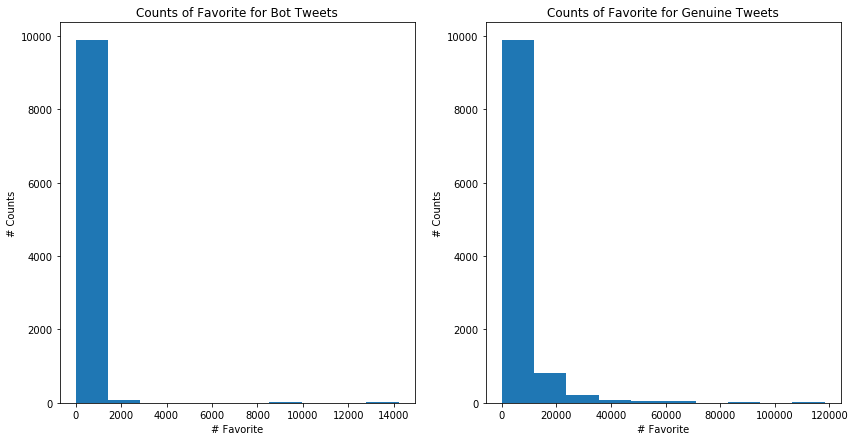

In [107]:
# Create two dataframes with fraud and non-fraud data 
bots = df2.loc[df2['class'] == 1] 
gen = df2.loc[df2['class'] == 0]

plt.figure(figsize=(14,7))

# Plot histograms of the retweet_count in bot and gen tweets
plt.subplot(1, 2, 1)
plt.hist(bots.favourites_count)
plt.xlabel('# Favorite')
plt.ylabel('# Counts')
plt.title('Counts of Favorite for Bot Tweets')

# Plot histograms of the num_mentions in bot and gen tweets
plt.subplot(1, 2, 2)
plt.hist(gen.favourites_count)
plt.xlabel('# Favorite')
plt.ylabel('# Counts')
plt.title('Counts of Favorite for Genuine Tweets')
plt.show()

In [108]:
# Group by num_mentions groups and get the mean
df2.groupby('retweet_count').mean()

# Count the values of the observations in each num_mentions group
print(df2['retweet_count'].value_counts())

0       16779
1        1344
2         378
3         202
4         111
        ...  
889         1
841         1
2872        1
793         1
2047        1
Name: retweet_count, Length: 1061, dtype: int64


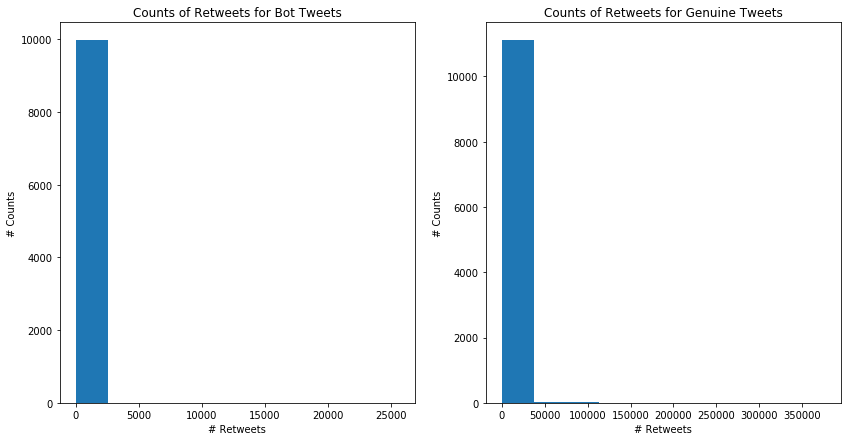

In [109]:
# Create two dataframes with fraud and non-fraud data 
bots = df2.loc[df2['class'] == 1] 
gen = df2.loc[df2['class'] == 0]

plt.figure(figsize=(14,7))

# Plot histograms of the retweet_count in bot tweets
plt.subplot(1, 2, 1)
plt.hist(bots.retweet_count)
plt.xlabel('# Retweets')
plt.ylabel('# Counts')
plt.title('Counts of Retweets for Bot Tweets')


# Plot histograms of the retweet_count in gen tweets
plt.subplot(1, 2, 2)
plt.hist(gen.retweet_count)
plt.xlabel('# Retweets')
plt.ylabel('# Counts')
plt.title('Counts of Retweets for Genuine Tweets')
plt.show()

__Observation__: We can observe several genuine tweets that have more than 100,000 retweets. This may have skewed the average retweet count for genuine tweets. Likewise with the number of mentions, there are a couple of tweets that consists of 6 mentions or more while the average mention is around 2 for genuine tweets.

## Clustering Pre-Processing 
Before we can begin clustering perpare the data by:

1. Unskew the data - log transformation 
2. Standardize to the same average values
3. Scale to the same standard deviation 
4. Store as a separate array to be used for clustering 


In [110]:
df2.describe()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,class,retweet_count,reply_count,favorite_count,num_hashtags,...,num_mentions,account_age_yr,digit_in_name,user_name_len,tweet_hour,tweet_month,tweet_day,tweet_year,tweet_length,num_of_words
count,21113.000000,21113.000000,21113.000000,21113.000000,21113.000000,21113.000000,21113.000000,21113.0,21113.000000,21113.000000,...,21113.000000,21113.000000,21113.000000,21113.000000,21113.00000,21113.000000,21113.000000,21113.000000,21113.000000,21113.000000
mean,16863.753422,2929.890920,1196.942121,2815.202624,28.250414,0.472316,364.842325,0.0,0.303747,0.155212,...,0.460001,7.673187,0.302847,11.339743,11.79425,6.926586,16.294984,2014.104770,76.521527,12.398901
std,27755.385315,35002.167174,3472.134543,7501.726624,199.413849,0.499245,6153.067749,0.0,1.957306,0.552834,...,0.759569,1.771675,0.847270,2.469308,7.48191,3.357957,9.072465,0.759749,35.904194,6.539560
min,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,5.000000,0.000000,3.000000,0.00000,1.000000,1.000000,2008.000000,1.000000,1.000000
25%,4032.000000,275.000000,271.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,6.000000,0.000000,10.000000,4.00000,4.000000,8.000000,2014.000000,50.000000,7.000000
50%,11078.000000,671.000000,737.000000,95.000000,4.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,7.000000,0.000000,11.000000,13.00000,8.000000,17.000000,2014.000000,73.000000,11.000000
75%,14140.000000,1119.000000,1605.000000,2447.000000,10.000000,1.000000,0.000000,0.0,0.000000,0.000000,...,1.000000,9.000000,0.000000,13.000000,18.00000,10.000000,24.000000,2015.000000,104.000000,17.000000
max,333504.000000,986837.000000,90861.000000,118225.000000,4840.000000,1.000000,376230.000000,0.0,165.000000,8.000000,...,11.000000,12.000000,9.000000,15.000000,23.00000,12.000000,31.000000,2015.000000,150.000000,32.000000


In [ ]:
# skewness along the index axis 
df2.skew(axis = 0, skipna = False)

In [111]:
def skewness_table(df):
        # Skewness scores 
        skew = df.skew(axis = 0)
        
        # kurtosis scores
        kurtosis = df.kurt(axis = 0)
        
        # Make a table with the results
        skew_table = pd.concat([skew, kurtosis], axis=1)
        
        # Rename the columns
        skew_table_ren_columns = skew_table.rename(
        columns = {0 : 'Skewness', 1 : 'Kurtosis'})
        
        # Sort the table by skewness descending
        skew_table_ren_columns = skew_table_ren_columns[
            skew_table_ren_columns.iloc[:,0] != 0].sort_values(
        'Skewness', ascending=False).round(1)
        
        # Return the dataframe with skewness information
        return skew_table_ren_columns

In [112]:
skewness_table(df2)

,Skewness,Kurtosis
favorite_count,41.0,2749.1
retweet_count,34.3,1488.6
followers_count,25.2,673.7
friends_count,19.7,475.3
listed_count,18.3,391.5
favourites_count,6.7,69.1
num_hashtags,5.5,42.2
statuses_count,5.1,37.8
digit_in_name,4.0,22.5
num_mentions,2.9,16.6


In [113]:
# Get columns with >= 0.5 skewness score
skewnes_df = skewness_table(df2)
skew_columns = list(skewnes_df[skewnes_df['Skewness'] >= 0.5].index)
print('We will transform %d columns.' % len(skew_columns))

We will transform 11 columns.


In [117]:
# Apply log transformation
df_log = df2.copy()
df_log[skew_columns] = df2[skew_columns].apply(lambda x: np.log(x))

df_log.head()

/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,statuses_count,followers_count,friends_count,favourites_count,listed_count,class,retweet_count,reply_count,favorite_count,num_hashtags,...,num_mentions,account_age_yr,digit_in_name,user_name_len,tweet_hour,tweet_month,tweet_day,tweet_year,tweet_length,num_of_words
0,3.970292,0.693147,3.610918,-inf,-inf,1,-inf,0,0.0,-inf,...,0.0,5,-inf,12,12,7,3,2014,111,19
1,9.505470,6.232448,7.159292,0.000000,2.079442,1,-inf,0,-inf,-inf,...,-inf,8,0.0,15,20,9,15,2014,61,7
2,9.187072,9.973946,7.853216,-inf,-inf,1,-inf,0,-inf,-inf,...,-inf,7,-inf,11,14,10,2,2014,56,7
3,11.124199,6.822197,6.590301,7.595387,1.609438,1,5.549076,0,-inf,-inf,...,0.0,10,-inf,10,18,10,28,2014,115,15
4,9.371438,6.527958,6.198479,0.000000,1.098612,1,-inf,0,-inf,-inf,...,-inf,7,0.0,15,4,9,21,2014,56,8


In [118]:
# Initialize StandardScaler and fit it 
scaler = StandardScaler(); scaler.fit(df_log)

# Transform and store the scaled data 
df_norm = scaler.transform(df_log)

ValueError: Input contains infinity or a value too large for dtype('float64').

## Reduce Dimensions: PCA vs TSNE

In [ ]:
df_norm.shape

In [ ]:
df_norm.columns

In [119]:
# Define varaibles 
y = np.array(df2['class'])
X = np.array(df2.drop(['class'], 1).astype(float))

In [120]:
# Normalize the data.
X_norm = normalize(X)

In [121]:
# Utility function to visualize the outputs of t-SNE and PCA

def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

### PCA

In [122]:
# PCA to reduce dimension to 2
time_start = time.time()

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_norm)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 0.15708303451538086 seconds


In [123]:
pca_df = pd.DataFrame(columns = ['pca1','pca2'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]

print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [0.61240132 0.19894968]


(<Figure size 576x576 with 1 Axes>,
 [Text(-0.18014365103211225, 0.040084092446309526, '0'),
  Text(-0.2149260964313413, -0.14717506301854782, '1')])

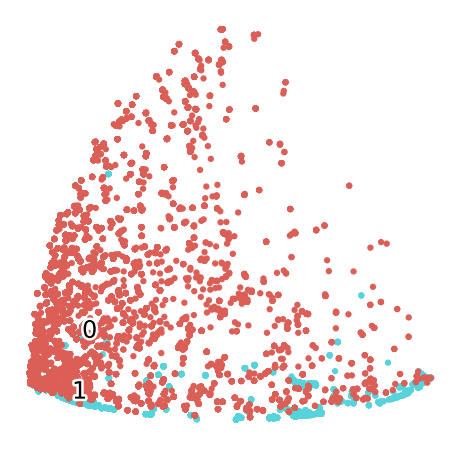

In [124]:
# Visualizing the PCA output
fashion_scatter(pca_df.values,y)

### TSNE

t-distributed Stochastic Neighbor Embedding converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data.  

In [125]:
# TSNE to reduce dimension to 2
time_start = time.time()

tsne = TSNE(n_components=2, verbose=1, random_state=42)
tsne_result = tsne.fit_transform(X_norm)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

# Summary of transformation
print(tsne_result.shape)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 21113 samples in 0.600s...
[t-SNE] Computed neighbors for 21113 samples in 3.465s...
[t-SNE] Computed conditional probabilities for sample 1000 / 21113
[t-SNE] Computed conditional probabilities for sample 2000 / 21113
[t-SNE] Computed conditional probabilities for sample 3000 / 21113
[t-SNE] Computed conditional probabilities for sample 4000 / 21113
[t-SNE] Computed conditional probabilities for sample 5000 / 21113
[t-SNE] Computed conditional probabilities for sample 6000 / 21113
[t-SNE] Computed conditional probabilities for sample 7000 / 21113
[t-SNE] Computed conditional probabilities for sample 8000 / 21113
[t-SNE] Computed conditional probabilities for sample 9000 / 21113
[t-SNE] Computed conditional probabilities for sample 10000 / 21113
[t-SNE] Computed conditional probabilities for sample 11000 / 21113
[t-SNE] Computed conditional probabilities for sample 12000 / 21113
[t-SNE] Computed conditional probabilities for sam

In [126]:
tsne_result

array([[ -5.3361735,  27.672611 ],
       [ 73.94629  , -25.821362 ],
       [-40.181335 ,  74.09823  ],
       ...,
       [-53.3902   , -64.061806 ],
       [-30.326284 ,  57.479824 ],
       [ 69.26046  , -11.019126 ]], dtype=float32)

(<Figure size 576x576 with 1 Axes>,
 [Text(1.343046, -24.339355, '0'), Text(-4.514024, 32.20531, '1')])

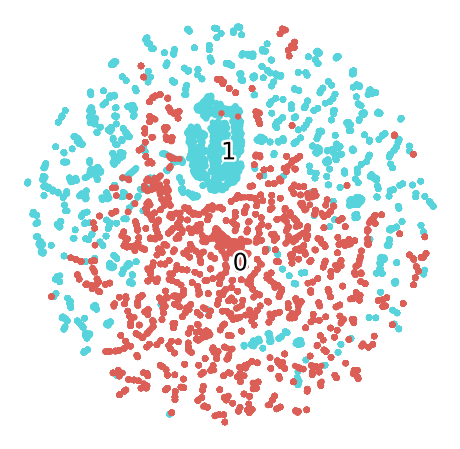

In [127]:
# Visualizing the TSNE output
fashion_scatter(tsne_result, y)

__Observation__: There aren't major distinct clusters between tweets generated by humans and robots.

### KMeans Classifer
Let's see KMeans is label tweets outside of it's centroid as tweets from robots.

In [128]:
# Define the model 
kmeans = MiniBatchKMeans(n_clusters=2, random_state=42)

# Fit the model to the scaled data
kmeans.fit(tsne_result)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=2,
        n_init=3, random_state=42, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [129]:
# Fit KMeans and calculate SSE for each k between 1 and 10
for k in range(1, 11):
  
    # Initialize KMeans with k clusters and fit it 
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=1).fit(tsne_result)
    
    # Assign sum of squared distances to k element of the sse dictionary
    sse[k] = kmeans.inertia_   

# Add the plot title, x and y axis labels
plt.title('The Elbow Method'); plt.xlabel('k'); plt.ylabel('SSE')

# Plot SSE values for each k stored as keys in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

NameError: name 'sse' is not defined

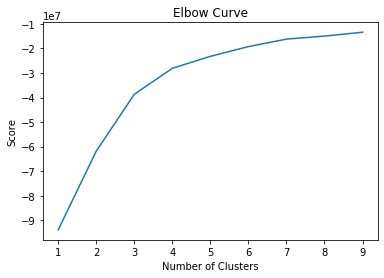

In [130]:
# Define the range of clusters to try
clustno = range(1, 10)

# Run MiniBatch Kmeans over the number of clusters
kmeans = [MiniBatchKMeans(n_clusters=i) for i in clustno]

# Obtain the score for each model
score = [kmeans[i].fit(tsne_result).score(tsne_result) for i in range(len(kmeans))]

# Plot the models and their respective score 
plt.plot(clustno, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

__Observation__: Based on the Elbow Curve, 3 appears to the optimal number of clusters. 

In [132]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(tsne_result, y, test_size=0.3, random_state=42)

# Define K-means model 
kmeans = MiniBatchKMeans(n_clusters=4, random_state=42).fit(X_train)

# Obtain predictions and calculate distance from cluster centroid
X_test_clusters = kmeans.predict(X_test)
X_test_clusters_centers = kmeans.cluster_centers_
dist = [np.linalg.norm(x-y) for x, y in zip(X_test, X_test_clusters_centers[X_test_clusters])]

# Create bot tweets predictions based on outliers on clusters 
km_y_pred = np.array(dist)
km_y_pred[dist >= np.percentile(dist, 95)] = 1
km_y_pred[dist < np.percentile(dist, 95)] = 0

In [133]:
# Calculate metrics
km_roc_auc = roc_auc_score(y_test, km_y_pred)
km_accuracy = accuracy_score(y_test, km_y_pred)
km_recall = recall_score(y_test, km_y_pred)
km_precision = precision_score(y_test, km_y_pred)

# Print metrics
print("ROC_AUC: %.2f%%" % (km_roc_auc * 100.0))
print("Accuracy: %.2f%%" % (km_accuracy * 100.0))
print('Recall: %.2f%%' % (km_recall * 100.0))
print('Precision: %.2f%%' % (km_precision * 100.0))
print(confusion_matrix(y_test, km_y_pred))

ROC_AUC: 51.90%
Accuracy: 54.06%
Recall: 7.03%
Precision: 66.46%
[[3212  107]
 [2803  212]]


__Evaluation__: Classifying tweets from robots based on cluser outliers is not a recommend techquie. The Kmean model was not able to distingish differences between robot and genuine tweets. 

## Tweets Segmentation 
In this section, we will perform clustering to examine tweet patterns within each cluster. 

### Metrics 
__Homogeneity__: measures how many members of a single class is within a cluster. Score ranges between 0.0 and 1.0. 1.0 stands for perfectly homogeneous labeling.

__Silhouette Coefficient__: the mean distance between a sample and all other points in the same class (a), the mean distance between a sample and all other points in the next nearest cluster (b), divided by whichever of the two values is highest. A coefficients near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.[Resource](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py)

### KMeans
This algorithm partitions the dataset into clusters to form homogeneous groups. Through an iterative process, it places random centroids and groups the closest datapoint to centroids. The group mean distance to the centroid is calculated and the process will repeat until optimized.

__Assumptions__
 * Symmetric distribution of variables(not skewed)
 * Variables with same average values
 * Variables with same variance 
 

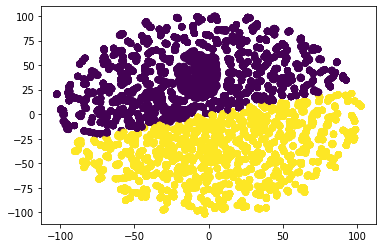

Comparing k-means clusters against the data:
col_0     0     1
row_0            
0      2952  7762
1      8189  2210


In [134]:
# Fit values
km1 = KMeans(n_clusters=2, random_state=42).fit(tsne_result)

# Obtain the predicted labels and calculate number of clusters
km1_y_pred = km1.labels_

# Plot the solution.
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=km1_y_pred)
plt.show()

# Check the solution against the data
print('Comparing k-means clusters against the data:')
print(pd.crosstab(km1_y_pred, y))

In [136]:
# Calculate metrics
km1_homo = homogeneity_score(y, km1_y_pred)
km1_sil = silhouette_score(tsne_result, km1_y_pred)

# Print metrics
print("Homogeneity: %0.3f" % km1_homo)
print("Silhouette Coefficient: %0.3f" % km1_sil)

Homogeneity: 0.200
Silhouette Coefficient: 0.335


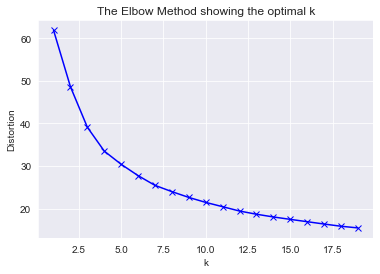

In [137]:
# Use the elbow method to see what is the optimal amount of clusters.

# k means determine k
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(tsne_result)
    kmeanModel.fit(tsne_result)
    distortions.append(sum(np.min(cdist(tsne_result, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / tsne_result.shape[0])

# Plot the elbow
sns.set_style('darkgrid')
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

__Observation__: The elbow method recommends 5 clusters

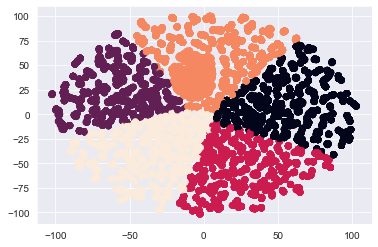

Comparing k-means clusters against the data:
col_0     0     1
row_0            
0      2203  2203
1      1001  2618
2      3274   644
3       951  3776
4      3712   731


In [138]:
# Fit values
km2 = KMeans(n_clusters=5, random_state=42).fit(tsne_result)

# Obtain the predicted labels and calculate number of clusters
km2_y_pred = km2.labels_

# Plot the solution.
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=km2_y_pred)
plt.show()

# Check the solution against the data
print('Comparing k-means clusters against the data:')
print(pd.crosstab(km2_y_pred, y))

In [139]:
# Calculate metrics
km2_homo = homogeneity_score(y, km2_y_pred)
km2_sil = silhouette_score(tsne_result, km2_y_pred)

# Print metrics
print("Homogeneity: %0.3f" % km2_homo)
print("Silhouette Coefficient: %0.3f" % km2_sil)

Homogeneity: 0.226
Silhouette Coefficient: 0.332


#### MiniBatch
To reduce computationally time, we'll use Mini Batch only sample random observations.

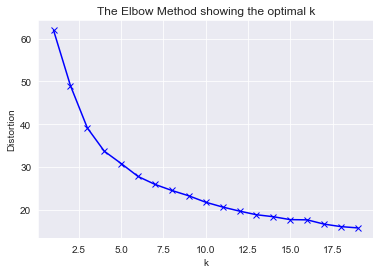

In [140]:
# Use the elbow method to see what is the optimal amount of clusters.

# k means determine k
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = MiniBatchKMeans(n_clusters=k).fit(tsne_result)
    kmeanModel.fit(tsne_result)
    distortions.append(sum(np.min(cdist(tsne_result, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / tsne_result.shape[0])

# Plot the elbow
sns.set_style('darkgrid')
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
# Fit values
mb = MiniBatchKMeans(n_clusters=4, random_state=42).fit(X_scaled)

# Obtain the predicted labels and calculate number of clusters
mb_y_pred = mb.labels_

# Plot the solution.
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=mb_y_pred)
plt.show()

# Check the solution against the data
print('Comparing k-means clusters against the data:')
print(pd.crosstab(mb_y_pred, y))

In [ ]:
# Calculate metrics
mb_homo = homogeneity_score(y, mb_y_pred)
mb_sil = silhouette_score(X_scaled, mb_y_pred)

# Print metrics
print("Homogeneity: %0.3f" % mb_homo)
print("Silhouette Coefficient: %0.3f" % mb_sil)

### DBSCAN
Density-based spatial clustering of applications with noise (DBSCAN) is a density based method that groups together points with many nearby neighbors. Although we do not have to pre-select the number of clusters, we must define the minimum number of datapoints to make up a group. 

In [ ]:
# Initialize and fit the DBscan model
db = DBSCAN(eps=0.9, min_samples=10, n_jobs=-1).fit(X_scaled)

# Obtain the predicted labels and calculate number of clusters
db_y_pred = db.labels_
n_clusters = len(set(db_y_pred)) - (1 if -1 in db_y_pred else 0)

# Plot the solution.
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=db_y_pred)
plt.show()

# Check the solution against the data
print('Comparing DBSCAN clusters against the data:')
print(pd.crosstab(db_y_pred, y))

In [ ]:
# Calculate metrics
#db_homo = homogeneity_score(y, db_y_pred)
#db_sil = silhouette_score(X_scaled, db_y_pred)

# Print number of clusters
#print('Estimated number of clusters: %d' % n_clusters)

# Print metrics
#print("Homogeneity: %0.3f" % db_homo)
#print("Silhouette Coefficient: %0.3f" % db_sil)

# Error: ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

__Evaluation__: DBSCAN clustered the data into 1 group so we are unable to calculate silhouette score. This model was not able to form different clusters for tweet analysis.

### Mean-shift 
Mean shift clustering is a sliding-window-based algorithm that attempts to find dense areas of data points. It is a centroid-based algorithm meaning that the goal is to locate the center points of each group/class, which works by updating candidates for center points to be the mean of the points within the sliding-window. 

In [ ]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_scaled, quantile=0.2, n_samples=1000)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(X_scaled)

# Obtain the predicted labels and calculate number of clusters
ms_y_pred = ms.labels_

# Plot the solution.
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=ms_y_pred)
plt.show()

# Check the solution against the data
print('Comparing k-means clusters against the data:')
print(pd.crosstab(ms_y_pred, y))

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
ms_n_clusters = len(np.unique(ms_y_pred))

print("Number of estimated clusters: {}".format(ms_n_clusters))

In [ ]:
# Calculate metrics
#ms_homo = homogeneity_score(y, ms_y_pred)
#ms_sil = silhouette_score(X_scaled, ms_y_pred)

# Print metrics
#print("Homogeneity: %0.3f" % ms_homo)
#print("Silhouette Coefficient: %0.3f" % ms_sil)

# Note: ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

__Evaluation__: Like the DBSCAN model, Mean Shift model formed 1 group.

## Unsupervised Learning Conclusion 


In [ ]:
# Dataframe to hold the results
cluster_comparison = pd.DataFrame({'Model': ['KMeans (2 clusters)','KMeans (5 clusters)', 'MiniBatch (3 clusters)'],
                                 'Homogeneity': [km1_homo, km2_homo, mb_homo],
                                'Silhouette Coefficient': [km1_sil, km2_sil, mb_sil]})

# Horizontal bar chart of 
cluster_comparison.sort_values('Homogeneity', ascending = False)

__Which clustering method should we use?__ <br>
Given that the data is spirical and dense, homogeneity score of each cluster should be weighted more than the silhouette coefficent. KMeans with 5 clusteres had the highest homogeneity score noting that datapoints in the clusters were similar to each other. 

## Cluster Analysis
Now, we will explore the trends within each cluster.

In [ ]:
# Create a DataFrame by adding a new cluster label column
df3 = df2.assign(cluster=km2_y_pred)

# Group the data by cluster
print(df3.groupby(['cluster']).mean())


In [ ]:
df2['cluster_assignment'] = km2_y_pred
print(df2.groupby('cluster_assignment').mean())

In [ ]:
# Melt the normalized dataset and reset the index
datamart_melt = pd.melt(
  					datamart_normalized.reset_index(), 
                        
# Assign CustomerID and Cluster as ID variables                  
                    id_vars=['CustomerID', 'Cluster'],

# Assign RFM values as value variables
                    value_vars=['Recency', 'Frequency', 'MonetaryValue'], 
                        
# Name the variable and value
                    var_name='Metric', value_name='Value'
					)

In [ ]:
# Add the plot title
plt.title('Snake plot of normalized variables')

# Add the x axis label
plt.xlabel('Metric')

# Add the y axis label
plt.ylabel('Value')

# Plot a line for each value of the cluster variable
sns.lineplot(data=datamart_melt, x='Metric', y='Value', hue='Cluster')
plt.show()

__Cluster 0__: This cluster consists of an equal ratio of genuine and bot tweets. The average retweet count was 59 and average tweet length was around 80 characters. 

__Cluster 1__: Similar to Cluster 0, this group is made up of half bots and genuine tweets. However, the average retweet count is 1,953 indicating that the algorithm placed majority of high retweets in this group. 

__Cluster 2__: This Cluster contained the most genuine tweets with a ratio of 70:30 genuine to bot. Majority of tweets in this group was collected in May while the month of July was the most frequent for other groups. These genuine tweets don't include much words or urls in their tweets making the average tweet length the smallest compared to other groups. 

__Cluster 3__: These tweets were longer than other clusters with an average tweet length of 127 characters and used an average of 21 words. 

__Cluster 4__: Bot tweets make up most of this cluster. The average length of tweet is 91 which is much higher than cluster 2. Cluster 2 and 4 share many traits in terms of low retweet count, favorite count, and number of mentions.



# Conclusion

__Summary__
* Text Processing with Count Vectorization and Tidf Transformer
* Supervised Learning 
* Clustering 

__Future Work__
* Incorporate User data
* Look into the evolution of spambots and their behaviors
